# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнил студент гр. 1384 Шаганов Вячеслав.

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

Ранжированный, вариационный и интервальный ряды:

- *Ранжированный ряд* — это последовательность данных, упорядоченная по возрастанию или убыванию.

- *Вариационный ряд* — упорядоченная последовательность уникальных значений выборки.

- *Интервальный ряд* — распределение данных по интервалам с подсчётом частот или относительных частот попадания элементов в каждый интервал.

Графическое представление данных:

- *Полигон частот* — ломаная линия, соединяющая точки для каждой частоты над соответствующими значениями по оси данных.
  
- *Гистограмма* — столбчатая диаграмма, представляющая частотное распределение данных.

- *Эмпирическая функция распределения* — функция $F(x)$, отражающая накопленную частоту или долю элементов, не превышающую значение $x$:

  $ F(x) = \frac{\# \{ x_i: x_i \leq x \} }{N} $, где $x_i$ - элементы выборки
  


## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Загрузим выборку и выведем некоторые из её элементов, поделим совместные измерения двух случайных величин на две выборки: X и Y

In [2]:
import numpy as np

print_slice = lambda arr, k, prefix='': print(prefix, *arr[:k], '...', *arr[-k:], sep=' ')

with open('sample.txt', 'r') as f:
    sample = [[float(e) for e in s.split()] for s in f.readlines()]
print("Размер выборки:", len(sample))
print_slice(sample, 4, "sample:")

sample = np.array(sample)
X, Y = sample[:, 0], sample[:, 1]
print_slice(X, 4, "X:")
print_slice(Y, 4, "Y:")

Размер выборки: 120
sample: [498.0, 144.3] [428.0, 130.3] [468.0, 128.6] [482.0, 150.1] ... [464.0, 143.2] [406.0, 112.4] [443.0, 121.9] [421.0, 107.9]
X: 498.0 428.0 468.0 482.0 ... 464.0 406.0 443.0 421.0
Y: 144.3 130.3 128.6 150.1 ... 143.2 112.4 121.9 107.9


Построим ранжированный и вариационные ряды по выборке:

In [27]:
series = Y
ranked = np.sort(series)
print_slice(ranked, 10, 'Ранжированный ряд:')
var = np.array( [ranked[0]] + [ranked[i] for i in range(1, len(ranked)) if ranked[i] != ranked[i-1]] )
print_slice(var, 10, 'Вариационный ряд:')
print(f"Количество элементов в вариационном ряду: {len(var)}")

Ранжированный ряд: 62.6 74.1 74.1 81.7 84.3 86.1 87.7 93.6 94.6 95.9 ... 159.3 162.3 162.3 163.6 164.0 164.4 168.5 170.1 172.8 178.5
Вариационный ряд: 62.6 74.1 81.7 84.3 86.1 87.7 93.6 94.6 95.9 96.0 ... 159.1 159.3 162.3 163.6 164.0 164.4 168.5 170.1 172.8 178.5
Количество элементов в вариационном ряду: 100


Вычислим необходимое количество интервалов для построения интервального ряда:

In [28]:
k = 1 + 3.31 * np.log10(len(series))
k

np.float64(7.882089924417638)

Сделаем 7 интервалов. Рассчитаем их границы:

In [29]:
k = int(k) if int(k) % 2 == 1 else int(k) + 1
minval, maxval = var[[0, -1]]
h = (maxval - minval) / k
print(f'Ширина интервала: {h}')

print("Интервалы:")
intervals = [[minval + i*h, minval + (i+1)*h] for i in range(k)]
for i in range(k):
    b = intervals[i]
    print(f'\t[{b[0]}; {b[1]}{']' if i == k-1 else ')'}')

Ширина интервала: 16.557142857142857
Интервалы:
	[62.6; 79.15714285714286)
	[79.15714285714286; 95.71428571428572)
	[95.71428571428572; 112.27142857142857)
	[112.27142857142857; 128.82857142857142)
	[128.82857142857142; 145.38571428571427)
	[145.38571428571427; 161.94285714285715)
	[161.94285714285715; 178.5]


Теперь получим их середины и подсчитаем накопленные абсолютные и относительные частоты 

In [30]:
bins = [np.average(b) for b in intervals] # Середины интервалов 
counts = np.array([
    len(   
        series[    # получаем элементы по фильтру
            (series < intervals[i][1])   # отбираем элементы, меньшие x_{i+1}, где [x_i, x_{i+1}) - интервал
            | ((i == k-1) & (series <= intervals[i][1]))   # учитываем, что последний интервал имеет нестрогую правую границу
        ]
    ) for i in range(k)
])

rel_counts = counts / len(series)

print('Накопленные абсолютные частоты:', *counts)
print('Накопленные относительные частоты:', *rel_counts)

abs_freq = [counts[i] - (0 if i == 0 else counts[i-1]) for i in range(k)]
rel_freq = [rel_counts[i] - (0 if i == 0 else rel_counts[i-1]) for i in range(k)]
# Скрипт для построения таблички
'''
for i in range(k):
    b = intervals[i]
    print(i+1, f"[{b[0]}; {b[1]})", bins[i], abs_freq[i], abs_freq[i]/len(series), counts[i], counts[i]/len(series), sep=' | ')
''';

Накопленные абсолютные частоты: 3 9 20 59 94 111 120
Накопленные относительные частоты: 0.025 0.075 0.16666666666666666 0.49166666666666664 0.7833333333333333 0.925 1.0


В итоге получаем следующую таблицу, описывающую интервальный ряд: 

|  $ i $       |  Границы интервала  |  $ \tilde x_i $  |  $ m_i $  |  $  \tilde{m}_i $  |  $ m^{\textit{accum}}_i $  |  $ \tilde{m}^{\textit{accum}}_i $  |
|-|-|-|-|-|-|-|
1 | [62.6; 79.15714285714286) | 70.87857142857143 | 3 | 0.025 | 3 | 0.025
2 | [79.15714285714286; 95.71428571428572) | 87.43571428571428 | 6 | 0.05 | 9 | 0.075
3 | [95.71428571428572; 112.27142857142857) | 103.99285714285715 | 11 | 0.09166666666666666 | 20 | 0.16666666666666666
4 | [112.27142857142857; 128.82857142857142) | 120.55 | 39 | 0.325 | 59 | 0.49166666666666664
5 | [128.82857142857142; 145.38571428571427) | 137.10714285714283 | 35 | 0.2916666666666667 | 94 | 0.7833333333333333
6 | [145.38571428571427; 161.94285714285715) | 153.6642857142857 | 17 | 0.14166666666666666 | 111 | 0.925
7 | [161.94285714285715; 178.5) | 170.2214285714286 | 9 | 0.075 | 120 | 1.0

Здесь:
  * $ \tilde x_i $ -- середина $ i $-го частичного интервала;
  * $ m_i $ -- абсолютная частота $ i $-го частичного интервала;
  * $ \tilde{m}_i $ -- относительная частота $ i $-го частичного интервала;
  * $ m^{\textit{accum}}_i $ -- накопленная абсолютная частота для $ i $-го частичного интервала;
  * $ \tilde{m}^{\textit{accum}}_i $ -- накопленная относительная частота для $ i $-го частичного интервала.

Смотря на данную таблицу, можно заметить, что у 4 и 5 интервалов частоты более, чем в два раза превышают частоту любого другого интервала, а также что частоты сначала монотонно возрастают, а потом убывают. Это говорит о том, что распределение имеет моду, при том, вероятнее всего, одну.

Далее построим полигон, гистограмму и эмпирическую функцию абсолютных частот:

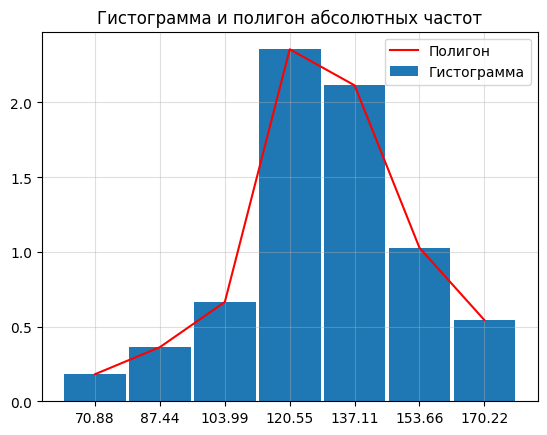

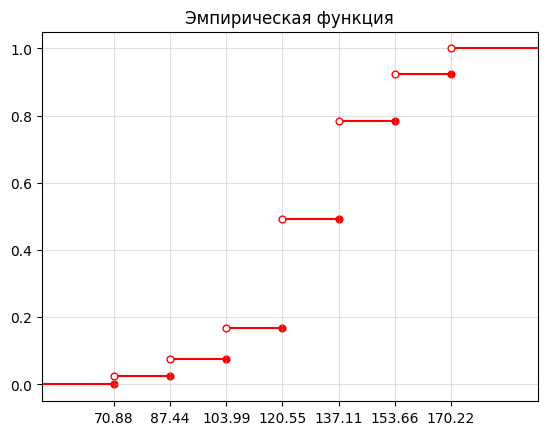

In [31]:
import matplotlib.pyplot as plt

def hist_n_polygon(bins, vals, title):
    plt.title(title)
    plt.grid(alpha=.4)
    plt.bar(bins, vals, width=.95*h, label='Гистограмма')
    plt.plot(bins, vals, c='r', label='Полигон')
    plt.xticks(bins)
    plt.legend()
    plt.show()

def emperical(bins, vals, title):
    plt.title(title)
    plt.grid(alpha=.4)
    # draw emperical function of distribution please 
    y = [[0, 0]]
    x = [[bins[0]*0.7, bins[0]]]

    for i in range(len(bins)):
        y.append([vals[i], vals[i]])
        x.append([bins[i], bins[i+1] if i != k-1 else bins[i]*1.15])
    
    for i in range(len(x)):
        plt.plot(x[i], y[i], c='r')
        # точки включения / исключения
        if i != len(x)-1:
            plt.scatter(x[i][1], y[i][0], c='r', s=24)
        if i != 0:
            plt.scatter(x[i][0], y[i][0], c='w', edgecolors='r', s=24, zorder=2)
    # plt.bar(bins, vals, width=.95*h, label='Эмпирическая функция')
    plt.xticks(bins)
    plt.xlim(x[0][0], x[-1][-1])
    plt.show()

hist_n_polygon(bins, abs_freq/h, "Гистограмма и полигон абсолютных частот")
emperical(bins, counts/len(series), "Эмпирическая функция")

Теперь изобразим полигон и гистограмму для относительных частот:

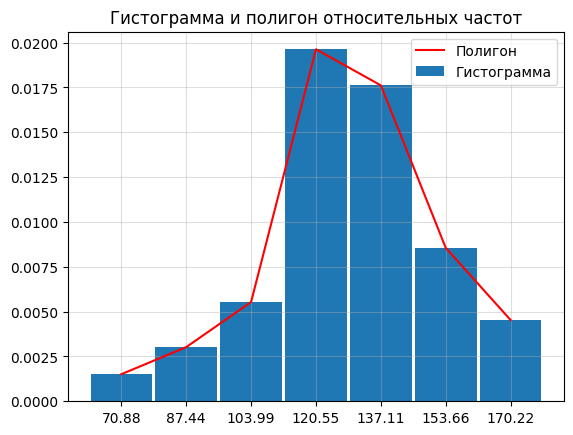

In [32]:
hist_n_polygon(bins, rel_freq/h, "Гистограмма и полигон относительных частот")

Видим, что график для относительных частот отличается лишь масштабом оси ординат, что ожидаемо, так как относительные частоты получаются делением абсолютных частот на размер выборки. 

Вид гистограммы отдалённо напоминает колокол, что наталкивает на мысль о том, что распределение случайной величины может быть нормальным.  

Проведём такой же анализ для выборки X.

In [9]:
series = X
ranked = np.sort(series)
print_slice(ranked, 10, 'Ранжированный ряд:')
var = np.array( [ranked[0]] + [ranked[i] for i in range(1, len(ranked)) if ranked[i] != ranked[i-1]] )
print_slice(var, 10, 'Вариационный ряд:')
print(f"Количество элементов в вариационном ряду: {len(var)}")

Ранжированный ряд: 321.0 331.0 331.0 345.0 352.0 353.0 362.0 366.0 372.0 376.0 ... 540.0 541.0 541.0 547.0 547.0 553.0 557.0 566.0 576.0 591.0
Вариационный ряд: 321.0 331.0 345.0 352.0 353.0 362.0 366.0 372.0 376.0 377.0 ... 521.0 523.0 540.0 541.0 547.0 553.0 557.0 566.0 576.0 591.0
Количество элементов в вариационном ряду: 81


In [11]:
k = 1 + 3.31 * np.log10(len(series))
k = int(k) if int(k) % 2 == 1 else int(k) + 1
minval, maxval = var[[0, -1]]
h = (maxval - minval) / k
print(f'Ширина интервала: {h}')

print("Интервалы:")
intervals = [[minval + i*h, minval + (i+1)*h] for i in range(k)]
for i in range(k):
    b = intervals[i]
    print(f'\t[{b[0]}; {b[1]}{']' if i == k-1 else ')'}')

Ширина интервала: 38.57142857142857
Интервалы:
	[321.0; 359.57142857142856)
	[359.57142857142856; 398.1428571428571)
	[398.1428571428571; 436.7142857142857)
	[436.7142857142857; 475.2857142857143)
	[475.2857142857143; 513.8571428571429)
	[513.8571428571429; 552.4285714285714)
	[552.4285714285714; 591.0]


Теперь построим интервальный ряд

In [13]:
bins = [np.average(b) for b in intervals] # Середины интервалов 
counts = np.array([
    len(   
        series[    # получаем элементы по фильтру
            (series < intervals[i][1])   # отбираем элементы, меньшие x_{i+1}, где [x_i, x_{i+1}) - интервал
            | ((i == k-1) & (series <= intervals[i][1]))   # учитываем, что последний интервал имеет нестрогую правую границу
        ]
    ) for i in range(k)
])

rel_counts = counts / len(series)

print('Накопленные абсолютные частоты:', *counts)
print('Накопленные относительные частоты:', *rel_counts)

abs_freq = [counts[i] - (0 if i == 0 else counts[i-1]) for i in range(k)]
rel_freq = [rel_counts[i] - (0 if i == 0 else rel_counts[i-1]) for i in range(k)]
# Скрипт для построения таблички
'''
for i in range(k):
    b = intervals[i]
    print(i+1, f"[{b[0]}; {b[1]})", bins[i], abs_freq[i], abs_freq[i]/len(series), counts[i], counts[i]/len(series), sep=' | ')
''';

Накопленные абсолютные частоты: 6 20 49 83 106 115 120
Накопленные относительные частоты: 0.05 0.16666666666666666 0.4083333333333333 0.6916666666666667 0.8833333333333333 0.9583333333333334 1.0


|  $ i $       |  Границы интервала  |  $ \tilde x_i $  |  $ m_i $  |  $  \tilde{m}_i $  |  $ m^{\textit{accum}}_i $  |  $ \tilde{m}^{\textit{accum}}_i $  |
|-|-|-|-|-|-|-|
1 | [321.0; 359.57142857142856) | 340.2857142857143 | 6 | 0.05 | 6 | 0.05
2 | [359.57142857142856; 398.1428571428571) | 378.85714285714283 | 14 | 0.11666666666666667 | 20 | 0.16666666666666666
3 | [398.1428571428571; 436.7142857142857) | 417.42857142857144 | 29 | 0.24166666666666667 | 49 | 0.4083333333333333
4 | [436.7142857142857; 475.2857142857143) | 456.0 | 34 | 0.2833333333333333 | 83 | 0.6916666666666667
5 | [475.2857142857143; 513.8571428571429) | 494.57142857142856 | 23 | 0.19166666666666668 | 106 | 0.8833333333333333
6 | [513.8571428571429; 552.4285714285714) | 533.1428571428571 | 9 | 0.075 | 115 | 0.9583333333333334
7 | [552.4285714285714; 591.0] | 571.7142857142858 | 5 | 0.041666666666666664 | 120 | 1.0

Далее построим гистограммы, полигоны и эспирическую функцию 

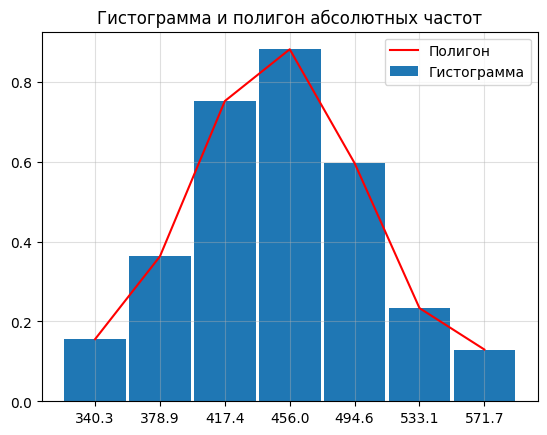

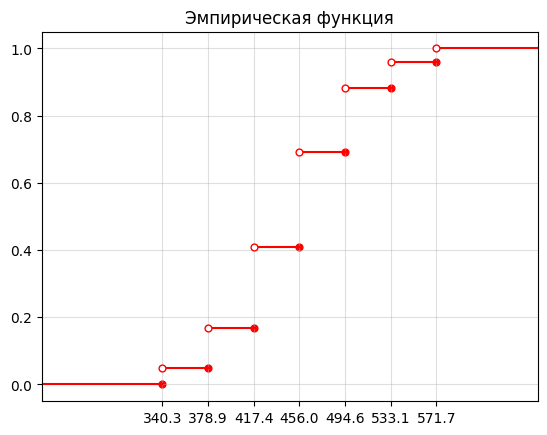

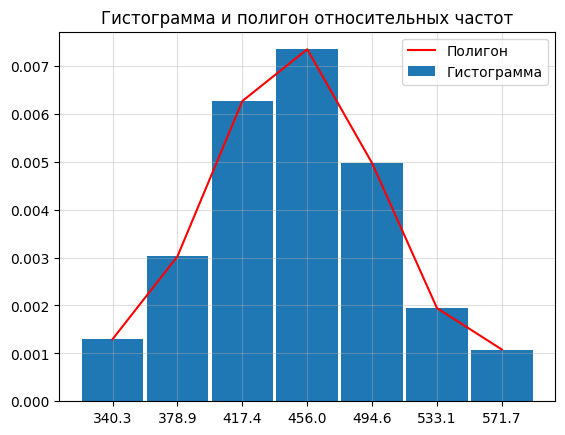

In [15]:
hist_n_polygon(bins, abs_freq/h, "Гистограмма и полигон абсолютных частот")
emperical(bins, counts/len(series), "Эмпирическая функция")
hist_n_polygon(bins, rel_freq/h, "Гистограмма и полигон относительных частот")

Для данной выборки гистограмма ещё больше похожа на ту, какую имела бы случайная величина, распределённая нормально.

## Выводы


В процессе работы успешно освоены ключевые методики формирования и анализа выборки. Из выбранной генеральной совокупности была сформирована репрезентативная выборка с использованием безвозвратного отбора. Данные прошли преобразование в ранжированный, вариационный и интервальный ряды.

Для абсолютных и относительных частот были построены и проанализированы полигон, гистограмма и эмпирическая функция распределения.